# Функция правдоподобия

Рассмотрим гамма распределение:

$$ \Gamma (x,a) \sim x^{a-1}e^{-x} $$

Если гамма является функцией плотности вероятности случайной величины, то значение функции в точке $x$ пропорционально вероятности того что случайная величина примет это значение.

Зададим Гамма-распределение вручную. Для простоты мы опустим нормировочный коэффициент (в данном случае нам не важны абсолютные значения функции.

In [1]:
import numpy as np
def gamma(x, a):
    return x**(a-1)*np.exp(-x)

Построим гамма распределнение относительно $x$  при $a = 2$.

Text(0, 0.5, '$\\Gamma(x, 2)$')

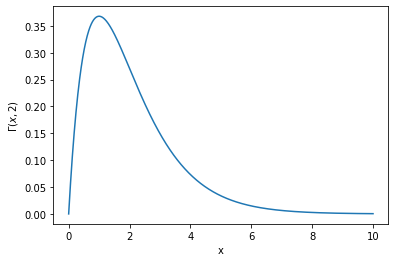

In [11]:
x = np.linspace(0, 10, 1000)
y = gamma(x, 2)

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("$\Gamma(x, 2)$")

Рассмотрим теперь распределение Гамма как функцию от $a$. Построим эту функцию для $x = 0.5$:

Text(0, 0.5, '$\\Gamma(0.5, a)$')

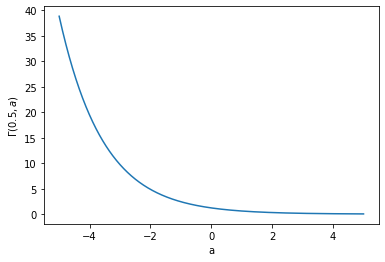

In [9]:
a = np.linspace(-5, 5, 1000)
y = gamma(0.5, a)

plt.plot(a, y)
plt.xlabel("a")
plt.ylabel("$\Gamma(0.5, a)$")

Распределение стремится к бесконечности при малых $a$. Это противоречит смыслу функции плотности вероятности. Все дало в том, что мы проигнорировали нормировку, которая включает в себя параметр $a$ - это было возможно когда мы говорили о функции плотности вероятности, но является грубой ошибкой при разговоре о функции правдоподобия. Давайте исправимся.

Text(0, 0.5, '$\\Gamma(0.5, a)$')

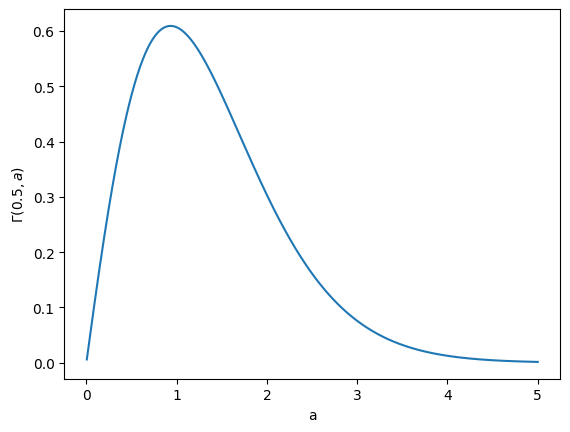

In [124]:
from scipy.stats import gamma
a = np.linspace(-5, 5, 1000)
y = [gamma(i).pdf(0.5) for i in a]

plt.plot(a, y)
plt.xlabel("a")
plt.ylabel("$\Gamma(0.5, a)$")

Функция правдоподобия - это совместное распределение выборки рассматриваемое как функция параметра. С практической точки зрения, мы получаем функцию правдоподобия из функции плотности вероятности считая значения случайно величины за параметр, а параметры - за аргументы функции.

## Функция правдоподобия для выборки

Рассмотрим выборку ста случайных величин из нормального распределения $\mathcal{N}(\mu=2, \sigma = 1)$

In [12]:
from scipy.stats import norm
x = norm(2, 1).rvs(100)

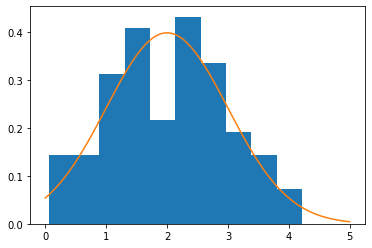

In [19]:
# Построим распределение
plt.hist(x, density = True)

# Наложим сверху функцию плотности вероятности
xv = np.linspace(0, 5, 100)
yv = norm(2,1).pdf(xv)
plt.plot(xv,yv)

Посчитаем значение функции правдоподобия на этой выборке для параметров $(\mu = 2, \sigma = 1)$:
$$\mathcal{L} = \prod_i \mathcal{N}(x_i;\mu\sigma)$$

In [16]:
pdfs = norm(2,1).pdf(x)

In [26]:
from functools import reduce
likelihood = reduce(lambda x, y: x*y,pdfs)

In [27]:
likelihood

6.104194481368059e-61

Абсолютное значение функции правдоподобия слишком мало. Будет лучше использовать логарифм функции правдоподобия:

In [28]:
np.log(likelihood)

-138.64871451786337

Давайте посмотрим как меняется значение логарифма функции правдоподобия для разных точек в пространстве $(\mu,\sigma)$

In [81]:
mus = np.linspace(0, 4, 101)
sigmas = np.linspace(0.5,1.5, 101)

logL = np.zeros((101,101))
for i,mu in enumerate(mus):
    for j,sigma in enumerate(sigmas):
        logL[i,j] = np.log(norm(mu,sigma).pdf(x)).sum()
        

Сперва построим профиль функции правдоподобия для $\mu$ считая $\sigma = 1$:

Text(0, 0.5, '$-log\\mathcal{L}$')

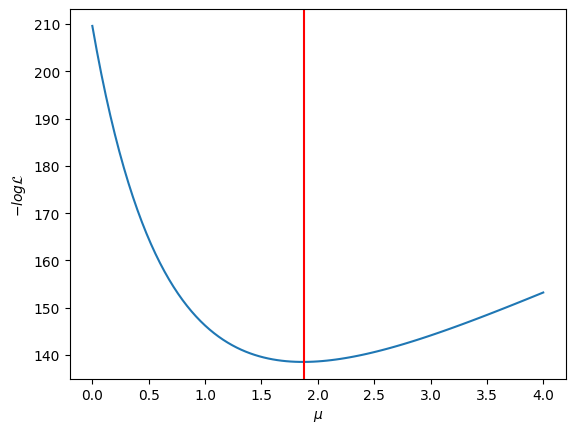

In [89]:
plt.plot(mus,-logL[50])
plt.axvline(mus[np.argmin(-logL[50])], color = "red")
plt.xlabel("$\mu$")
plt.ylabel("$-log\mathcal{L}$")

Теперь посмотрим на профиль функции правдоподобия фиксируя $\mu=2$:

Text(0, 0.5, '$-log\\mathcal{L}$')

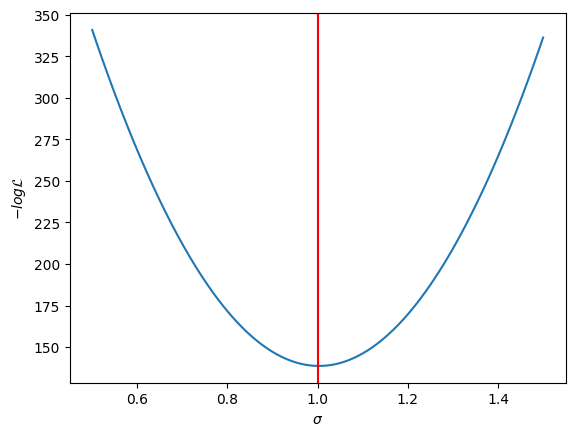

In [91]:
plt.plot(sigmas,-logL.T[50])
plt.axvline(sigmas[np.argmin(-logL.T[50])], color = "red")
plt.xlabel("$\sigma$")
plt.ylabel("$-log\mathcal{L}$")

Наконец, посмотрим на функцию правдоподобия на плоскости.

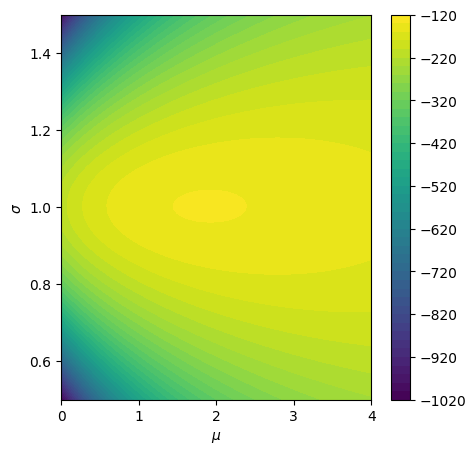

In [61]:
plt.style.use('default')
f = plt.figure(figsize = (5, 5))
h = plt.contourf(mus, sigmas, logL, 50)#, cmap='RdGy')
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.colorbar()
plt.show()

## Функция правдоподобия для зависимых переменных

Предположим, что случайная величина $y$ зависит от величины $x$ как $\mathcal{N}(x;\sigma)$ где $\sigma = 2$. Рассмотрим выборку из 100 событий.

In [92]:
x = np.linspace(1, 20, 100)

In [95]:
y = [norm(i,2).rvs() for i in x]

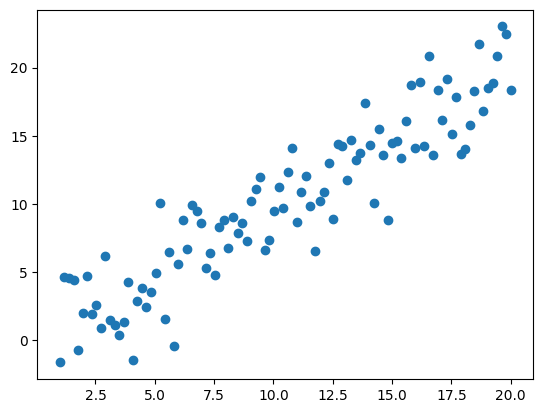

In [96]:
plt.scatter(x, y)

Логарифм функции правдоподобия для этой выборки имеет вид
$$-log\mathcal{L}=\sum_i\mathcal{N}(x_i,\sigma)$$

Рассмотрим зависимость логаримфма функции правдопдобия от значения $\sigma$

In [101]:
sigmas = np.linspace(1, 3, 100)
logL = np.zeros(len(sigmas))

for i,s in enumerate(sigmas):
    logL[i] = np.log([norm(j,s).pdf(y[i]) for i,j in enumerate(x)]).sum()

Text(0.5, 0, '$\\sigma$')

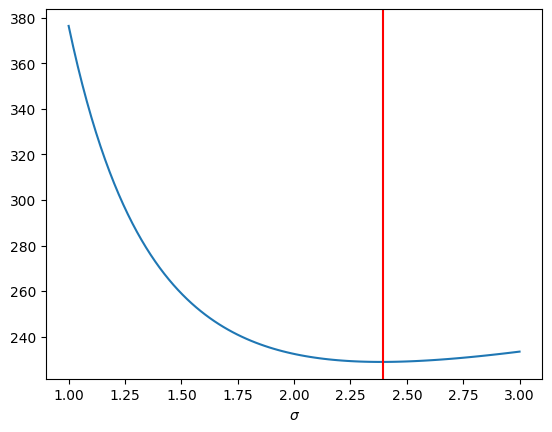

In [106]:
plt.plot(sigmas,-logL)
plt.axvline(sigmas[np.argmin(-logL)], color = "red")
plt.xlabel("$\sigma$")

## Разница в максимизации правдоподобия и апостериорного распределения

Рассмотрим выборку из распределения Бернулли

In [109]:
from scipy.stats import bernoulli
x = bernoulli(0.2).rvs(100)

Рассмотрим как меняются оценки MLE и MPA (априорное распределение - $\mathcal{B}(2,2)$)

In [114]:
MLE = [np.mean(x[:i+1]) for i, j in enumerate(x)]

In [117]:
MPA = [(x[:i+1].sum()+1)/(i+1+2)  for i, j in enumerate(x)]

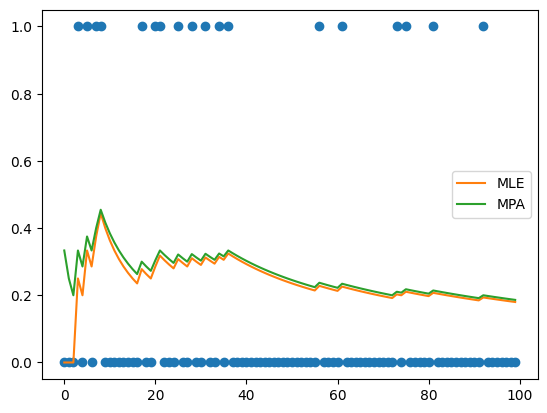

In [121]:
plt.plot(np.arange(0, 100),x,"o")
plt.plot(np.arange(0, 100),MLE,label = "MLE")
plt.plot(np.arange(0, 100),MPA,label = "MPA")
plt.legend()